## Task 1: Introduction

Welcome to **Sentiment Analysis with Keras and TensorFlow**.

![Sentiment Analysis](images/basic_sentiment_analysis.png)


## Task 2: The IMDB Reviews Dataset
____
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
____

In [4]:
from tensorflow.python.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [5]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(y_train[0])

1


In [7]:
class_names = ['Negative', 'Positive']

In [8]:
word_index = imdb.get_word_index()
print(word_index['hello'])

1646592/1641221 [==============================] - 1s 0us/step
4822


## Task 3: Decoding the Reviews
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [9]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [10]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [11]:
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))
    
show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260



## Task 4: Padding the Examples
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [12]:
word_index['the']

1

In [13]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [14]:
show_lengths()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [16]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Task 5: Word Embeddings
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___
Word Embeddings:

![Word Embeddings](images/word_embeddings.png)

Feature Vectors:

![Learned Embeddings](images/embeddings.png)


## Task 6: Creating and Training the Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_logging = LambdaCallback(on_epoch_end = lambda e, l: print(e, end='.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_logging],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

## Task 7: Predictions and Evaluation
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


Matplotlib is building the font cache; this may take a moment.


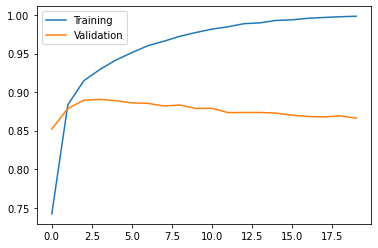

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['acc'], label='Training'),
plt.plot(range(E), h.history['val_acc'], label='Validation')
plt.legend()
plt.show()

In [20]:
loss, acc = model.evaluate(x_test, y_test)
print('test set accuracy: ', acc*100)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test set accuracy:  84.14400219917297


In [23]:
import numpy as np
p = model.predict(np.expand_dims(x_test[0], axis=0))
print(class_names[np.argmax(p[0])])

Negative


In [24]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the